The [multiplicative perceptron](https://clgiles.ist.psu.edu/papers/NIPS94.product.units.pdf) would have a forward pass as:
$$
f(\mathbf{X}, \xi) = \prod_{i} \sigma(x_{i})^{\xi_{i}}
$$
with $\sigma()$ being an activation function like sigmoid. Here we see that the multiplicative perceptron is equivalent to the additive (taking the dot product) one. 

The backward pass would therefore be derived starting with taking the logarithm:
$$
\log(f(\mathbf{X}, \xi)) = \log\left(\prod_{i} \sigma(x_{i})^{\xi_{i}}\right)
$$
and knowing logarithm properties, we have:
$$
\log(f(\mathbf{X}, \xi)) = \sum_{i} \xi_{i} \log(\sigma(x_{i}))
$$
and 
$$
\frac{\partial \log(f(\mathbf{X}, \xi))}{\partial \xi} = \sum_{i} \log(\sigma(x_{i}))
$$
Knowing that $\frac{\partial \log(f)}{\partial x} = \frac{1}{f}\frac{\partial f}{\partial x}$, we have:
$$
\frac{\partial f(\mathbf{X}, \xi)}{\partial \xi_{i}} = f(\mathbf{X}, \xi) \log(\sigma(x_{i}))
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

In [3]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [4]:
def train_test_split(X, y, split_ratio = 0.7):
    N = X.shape[0]
    rnd_idx = np.random.permutation(N)
    train_idx = rnd_idx[:int(split_ratio * X.shape[0])]
    test_idx = rnd_idx[int(split_ratio * X.shape[0]):]
    X_train = X[train_idx]
    y_train = y[train_idx]
    X_test = X[test_idx]
    y_test = y[test_idx]
    return X_train, y_train, X_test, y_test

In [5]:
class Net:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.ξ = np.random.randn(self.X.shape[1])/np.sqrt(self.X.shape[0])

    def forward(self, X):
        #perceptron output
        self.X_ = np.array([np.prod(sigmoid(X[i])**self.ξ) for i in range(X.shape[0])]) 

        # log(sigmoid(x_i))
        self.X_out = np.log(np.array([sigmoid(X[i]) for i in range(X.shape[0])]))
        return self.X_

    def backward(self, η, loss_back):
        #given 1 layer, no need to return anything
        self.ξ -= η * np.dot(self.X_, self.X_out)

    def mse(self, y, y_pred): #mean squared error loss
        return np.mean((y - y_pred)**2)

    def mse_prime(self, y, y_pred):
        return 2 * (y_pred - y)/np.size(y)

def run(X, y, epochs):
    X_train, y_train, X_test, y_test = train_test_split(X, y, 0.7)
    
    train_losses = []
    test_losses = []
    train_accs = []
    test_accs = []

    for epoch in range(epochs):
        if epoch % 10 == 9:
            print(f"Epoch {epoch + 1}/{epochs}")
        #Training
        net = Net(X_train, y_train)
        train_pred = net.forward(X_train)
        train_loss = net.mse(y_train, train_pred)
        train_losses.append(train_loss)
        train_pred_binary = np.where(train_pred > 0.5, 1, 0)
        test_acc = np.sum(y_train == train_pred_binary)/X_train.shape[0]
        train_accs.append(test_acc)
        #testing
        test_pred = net.forward(X_test)
        test_loss = net.mse(y_test, test_pred)
        test_losses.append(test_loss)
        test_pred_binary = np.where(test_pred > 0.5, 1, 0)
        test_acc = np.sum(y_test == test_pred_binary)/X_test.shape[0]
        test_accs.append(test_acc)

        #backward pass
        net.backward(0.05, net.mse_prime(y_train, train_pred))

            
    plt.plot(np.arange(epochs), train_losses, "k", label = "Train loss")
    plt.plot(np.arange(epochs), test_losses, "r", label = "Test loss")
    plt.plot(np.arange(epochs), train_accs, "g", label = "Train accuracy")
    plt.plot(np.arange(epochs), test_accs, "b", label = "Test accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.legend()
    plt.show()

Epoch 10/200
Epoch 20/200
Epoch 30/200
Epoch 40/200
Epoch 50/200
Epoch 60/200
Epoch 70/200
Epoch 80/200
Epoch 90/200
Epoch 100/200
Epoch 110/200
Epoch 120/200
Epoch 130/200
Epoch 140/200
Epoch 150/200
Epoch 160/200
Epoch 170/200
Epoch 180/200
Epoch 190/200
Epoch 200/200


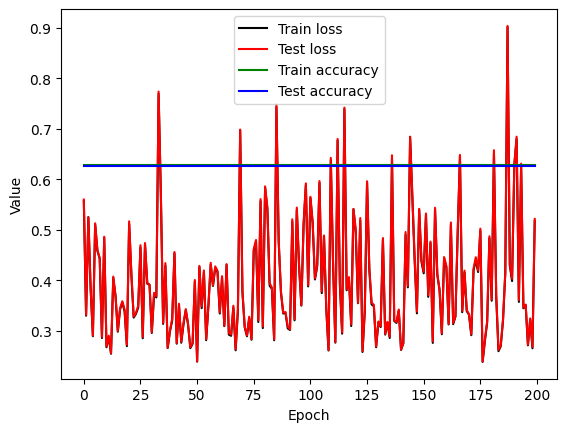

In [6]:
run(X, y, 200)